# Outline of Questions


1. What determines a car's selling price?
2. What are the most popular producer?
3. What is the most popular make and model of car?

# Load In Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv(r'../input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


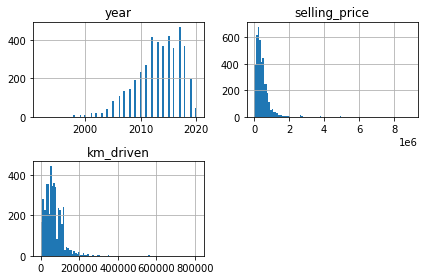

In [2]:
df.hist(bins = 100,)
plt.tight_layout()
plt.show()

In [3]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [4]:
df.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

# Q: What are the most popular producer of cars?

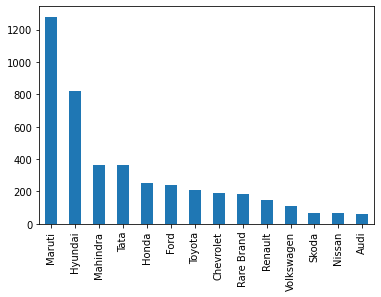

In [5]:
df["make"] = df.name.apply(lambda x : x.split(' ')[0])
df.loc[:,"make"] = df.make.apply(lambda x : "Rare Brand" if df.make.value_counts(normalize = True)[x] < 0.01  else x)
df.make.value_counts(normalize = False).plot(kind = "bar")
plt.show()

In [6]:
df.make.value_counts(normalize = True)

Maruti        0.294931
Hyundai       0.189171
Mahindra      0.084101
Tata          0.083180
Honda         0.058065
Ford          0.054839
Toyota        0.047465
Chevrolet     0.043318
Rare Brand    0.042396
Renault       0.033641
Volkswagen    0.024654
Skoda         0.015668
Nissan        0.014747
Audi          0.013825
Name: make, dtype: float64

In [7]:
top_5_per = df.make.value_counts(normalize = True)[:5]
for i in range(5):
    producer = top_5_per.index[i]
    produced = top_5_per[i]
    print("{}. {} produced a total of {:.2%} of the total cars seen.".format(i+1,producer, produced))
print("Combined these producers account for about {:.2%} of all car sells.".format(top_5_per.sum()))

1. Maruti produced a total of 29.49% of the total cars seen.
2. Hyundai produced a total of 18.92% of the total cars seen.
3. Mahindra produced a total of 8.41% of the total cars seen.
4. Tata produced a total of 8.32% of the total cars seen.
5. Honda produced a total of 5.81% of the total cars seen.
Combined these producers account for about 70.94% of all car sells.


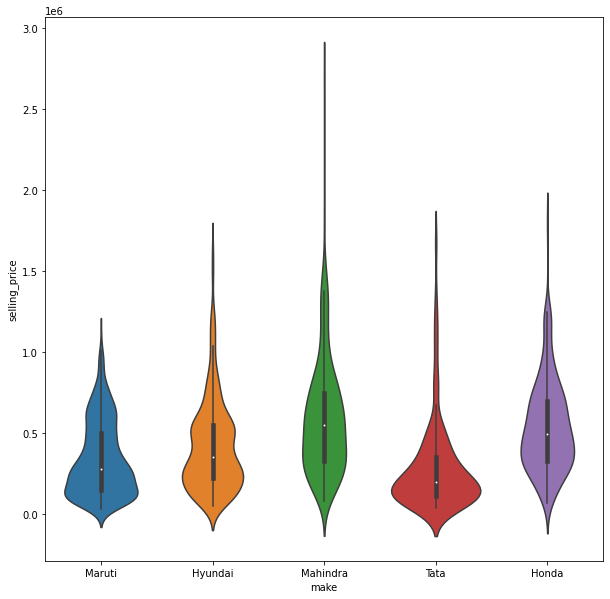

In [8]:
top_5 = ["Maruti", "Hyundai", "Mahindra", "Tata", "Honda"]
top_5_df = df[df.make.isin(top_5)]
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(data = top_5_df, x = "make", y = "selling_price", order = top_5, ax = ax)
plt.show()

1. On average it appears as though Maruti competes pretty closely with Hyundai, as they're distributions have heavy overlap.

2. Hyundai tend to sell slightly higher than Maruti's.

3. Mahindra is a broad competitor, it seems to have the largest range of any of the producers.

4. Tata cater's to predominantly the lower end of the scale, in a range where other competitors don't seem to be selling at.

5. Honda is the most direct competitor to Mahindra, as they are operating on almost an equally broad range, however Mahindra has more sales.


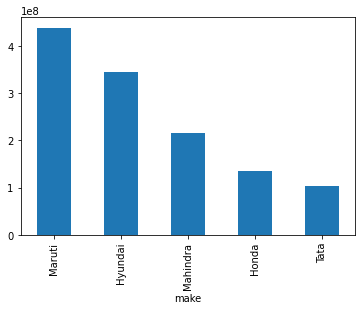

In [9]:
top_5_df.groupby("make")["selling_price"].sum().sort_values(ascending = False).plot(kind ="bar")
plt.show()

From this we see that the order is mostly the same, however Honda and Tata has swapped.
Not that suprising, as we saw in the previous graph that Hondas on average sell better than Tatas.

I'm curious to see how these top 5 producers look when it comes to miles driven vs. selling price; that is, how does the value of the cars scale with miles driven.

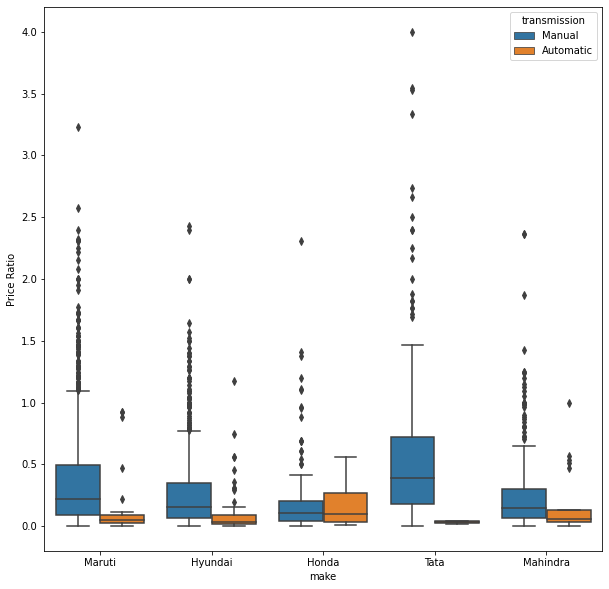

In [10]:
fig, ax = plt.subplots(figsize = (10,10))
df["Price Ratio"] = df.km_driven / df.selling_price
sns.boxplot(data = df[df.make.isin(top_5)], x = "make", y = "Price Ratio", hue ="transmission", ax = ax)
plt.show()

A larger ratio means that kilometers driven $>>$ selling price and so the car has retained its value.

Breaking this down across the brands and transmission types, I can draw the following conclusions:
1. Manuals retain value much better than Automatics
2. Tata's retain the most value with miles driven
3. Honda's are the worst at retaining value
4. For the Maruti/Hyundai rivalry, Maruti's retain value the best

Now I'd like to see how this breakdowns across fuel type.

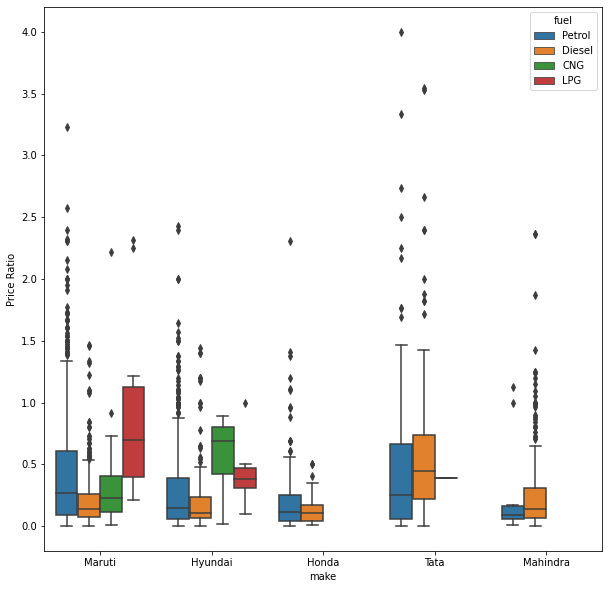

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(data = df[df.make.isin(top_5)], x = "make", y = "Price Ratio", hue ="fuel", ax = ax)
plt.show()

From this we can infer:
1. For Maruti, Hyundai and Honda: Petrols retain more value over diesel's.
2. For Tata and Mahindra: Diesel's retain more value
3. Honda, Tata, and Mahindra: Don't offer Compressed Natural Gas cars([CNG](https://en.wikipedia.org/wiki/Compressed_natural_gas)) or Liquified Petroleum Gas ([LPG](https://en.wikipedia.org/wiki/Liquefied_petroleum_gas)).

## Answer:

**Top 5 Car Producers** and their production rates are:
1. Maruti produced a total of 29.49% of the total cars seen.
2. Hyundai produced a total of 18.92% of the total cars seen.
3. Mahindra produced a total of 8.41% of the total cars seen.
4. Tata produced a total of 8.32% of the total cars seen.
5. Honda produced a total of 5.81% of the total cars seen.

Combined these producers account for about 70.94% of all car sells.

**Key Insights**

1. On average it appears as though Maruti competes pretty closely with Hyundai, as they're distributions have heavy overlap.
Although Hyundai looks to have more cars on the higher end of the scale.

2. Maruti's retain value the best with miles driven

3. Mahindra is a broad competitor, it seems to have the largest range of any of the producers.

4. Tata cater's to predominantly the lower end of the scale, in a range where other competitors don't seem to be selling at.
5. Honda is the most direct competitor to Mahindra, as they are operating on almost an equally broad range, however Mahindra has more sales.

6. For Maruti, Hyundai and Honda: Petrols retain more value over diesel's.

7. For Tata and Mahindra: Diesel's retain more value

8. Honda, Tata, and Mahindra: Don't offer Compressed Natural Gas cars([CNG](https://en.wikipedia.org/wiki/Compressed_natural_gas)) or Liquified Petroleum Gas ([LPG](https://en.wikipedia.org/wiki/Liquefied_petroleum_gas)).

9. Manuals retain value much better than Automatics

10. Tata retains the most value with miles driven and Honda is the worst

# Q: What's the most popular model of car?

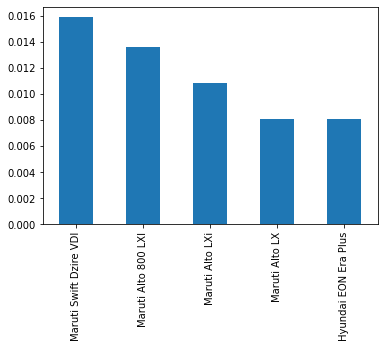

In [12]:
df["name"].value_counts(normalize = True)[:5].plot(kind = 'bar')
plt.show()

I'm going:
1. Pull the most popular models by the producer, as these make up a pretty small percentage of overall sells 
2. Take a look if we group over the first 2 words in the name column, and use this as a rough approximation of the makes of the cars.

These 5 car models make up 23.11% of the market share in India.


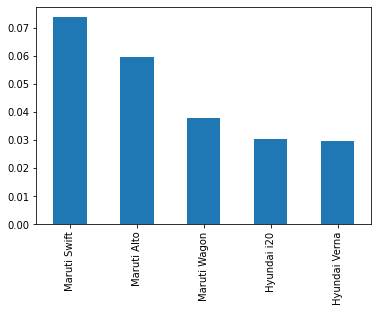

In [13]:
df["name_2"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:2]))
top_5_2 = df["name_2"].value_counts(normalize = True)[:5]
top_5_2.plot(kind = 'bar')
print("These 5 car models make up {:.2%} of the market share in India.".format(top_5_2.sum()))

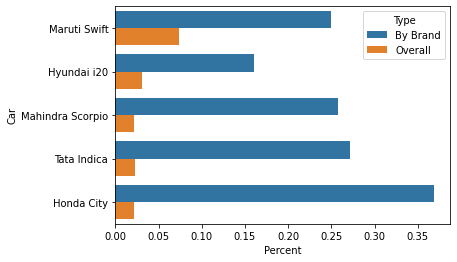

In [14]:
top_cars = list()
top_cars_per_brand = list()
top_cars_per_all = list()
for i in top_5:
    make_market_share = df[df.make == i][["name_2"]].value_counts(normalize = True).iloc[0:1]
    top_car = make_market_share.index[0][0]
    
    top_car_overall_percent = df.name_2.value_counts(normalize = True)[top_car]
    top_cars.append(top_car)
    top_cars_per_brand.append(make_market_share[0])
    top_cars_per_all.append(top_car_overall_percent)
plot_df = pd.DataFrame({"Car" : top_cars + top_cars,
                       "Percent" : top_cars_per_brand + top_cars_per_all,
                       "Type" : ["By Brand" for i in range(5)] + ["Overall" for i in range(5)]})
sns.barplot(data = plot_df, y = "Car", x = "Percent", hue = "Type")
plt.show()

## Answers:
The most popular overall car makes that make up about $24\%$ of this dataset:

1. Maruti Swift

2. Maruti Alto

3. Maruti Wagon

4. Hyundai i20

5. Hyundai Verna



Then for the top 5 brands, the most popular makes are:
1. Maruti Swift

2. Hyundai i20


3. Mahindra Scorpio


4. Tata Indica


5. Honda City



# Q: What Determine's a Car's Selling Price?

In [15]:
from sklearn.preprocessing import OneHotEncoder

owner_map = {"First Owner" : 1, "Second Owner" : 2, "Third Owner" : 3, "Fourth & Above Owner" : 4, "Test Drive Car" : 0}
df["owner_num"] = df.owner.map(owner_map)
df["make_num"] = df.make.map(df.make.value_counts(normalize = True))
enc = OneHotEncoder(sparse = False)
X = df[["fuel", "seller_type", "transmission"]]
X = enc.fit_transform(X)
new_col = enc.get_feature_names_out(["fuel","seller_type","transmission"])
df[new_col] = X

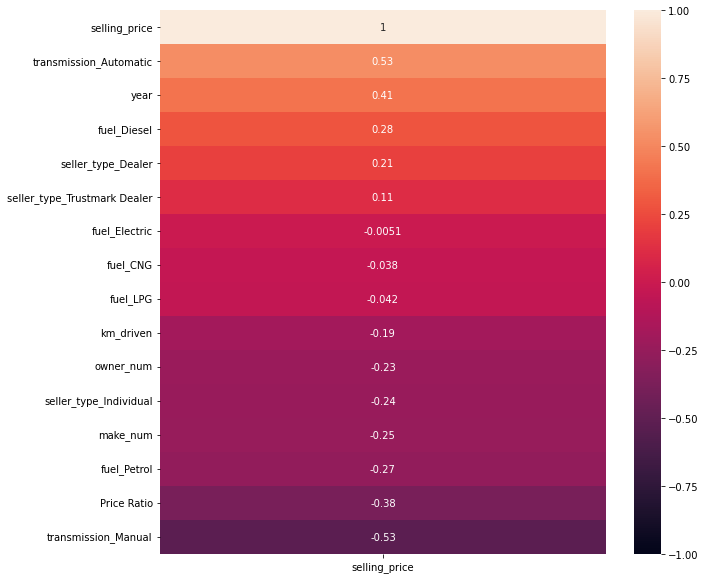

In [16]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr()[["selling_price"]].sort_values("selling_price", ascending = False),vmin = -1, vmax = +1, annot = True, ax = ax)
plt.show()

## Answer:

It looks like the top factors impacting the selling price are:
1. **Automatic v. Manual**: Manuals are cheaper than automatics
2. **Year**: The newer the car the better it sells
3. **Diesel v. Petrol**: Diesel's sell for more compared to automatics
4. **Dealer v. Individual**: You can buy a car cheaper from an individual compared to a dealer
5. **Number of Owners**: The fewer owners a car has had the better the price